In [37]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')

In [38]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


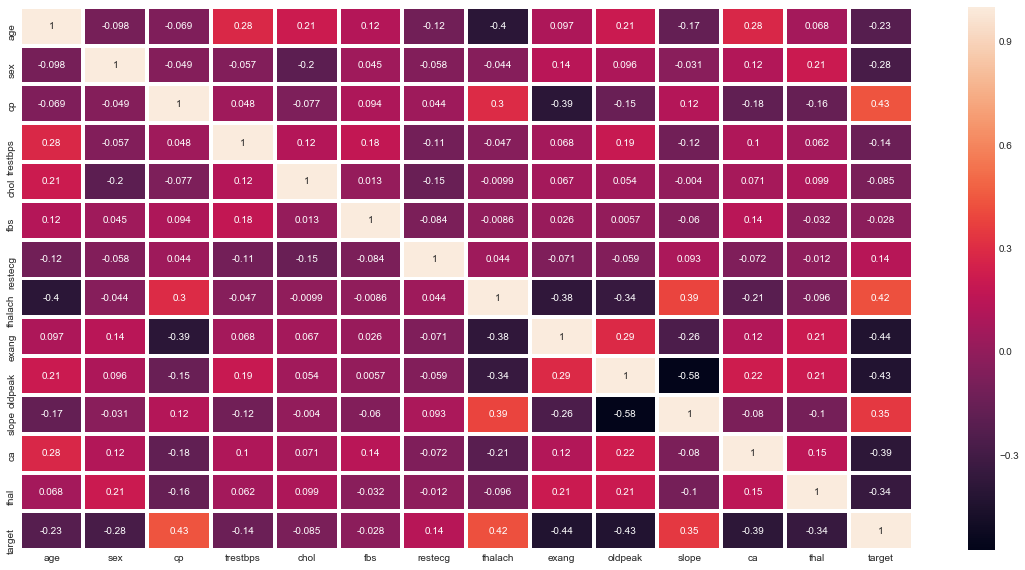

In [42]:
sns.set_style('whitegrid')
%matplotlib inline
plt.figure(figsize = (20, 10))
sns.heatmap(heart.corr(), annot= True, linewidth = 3)

Text(0.5,0,'no disease/disease')

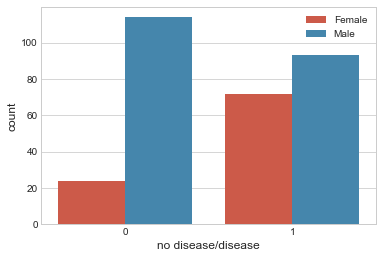

In [43]:
sns.countplot(x = 'target', data=heart, hue = 'sex')
plt.legend(['Female', 'Male'])
plt.xlabel ('no disease/disease')

In [44]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

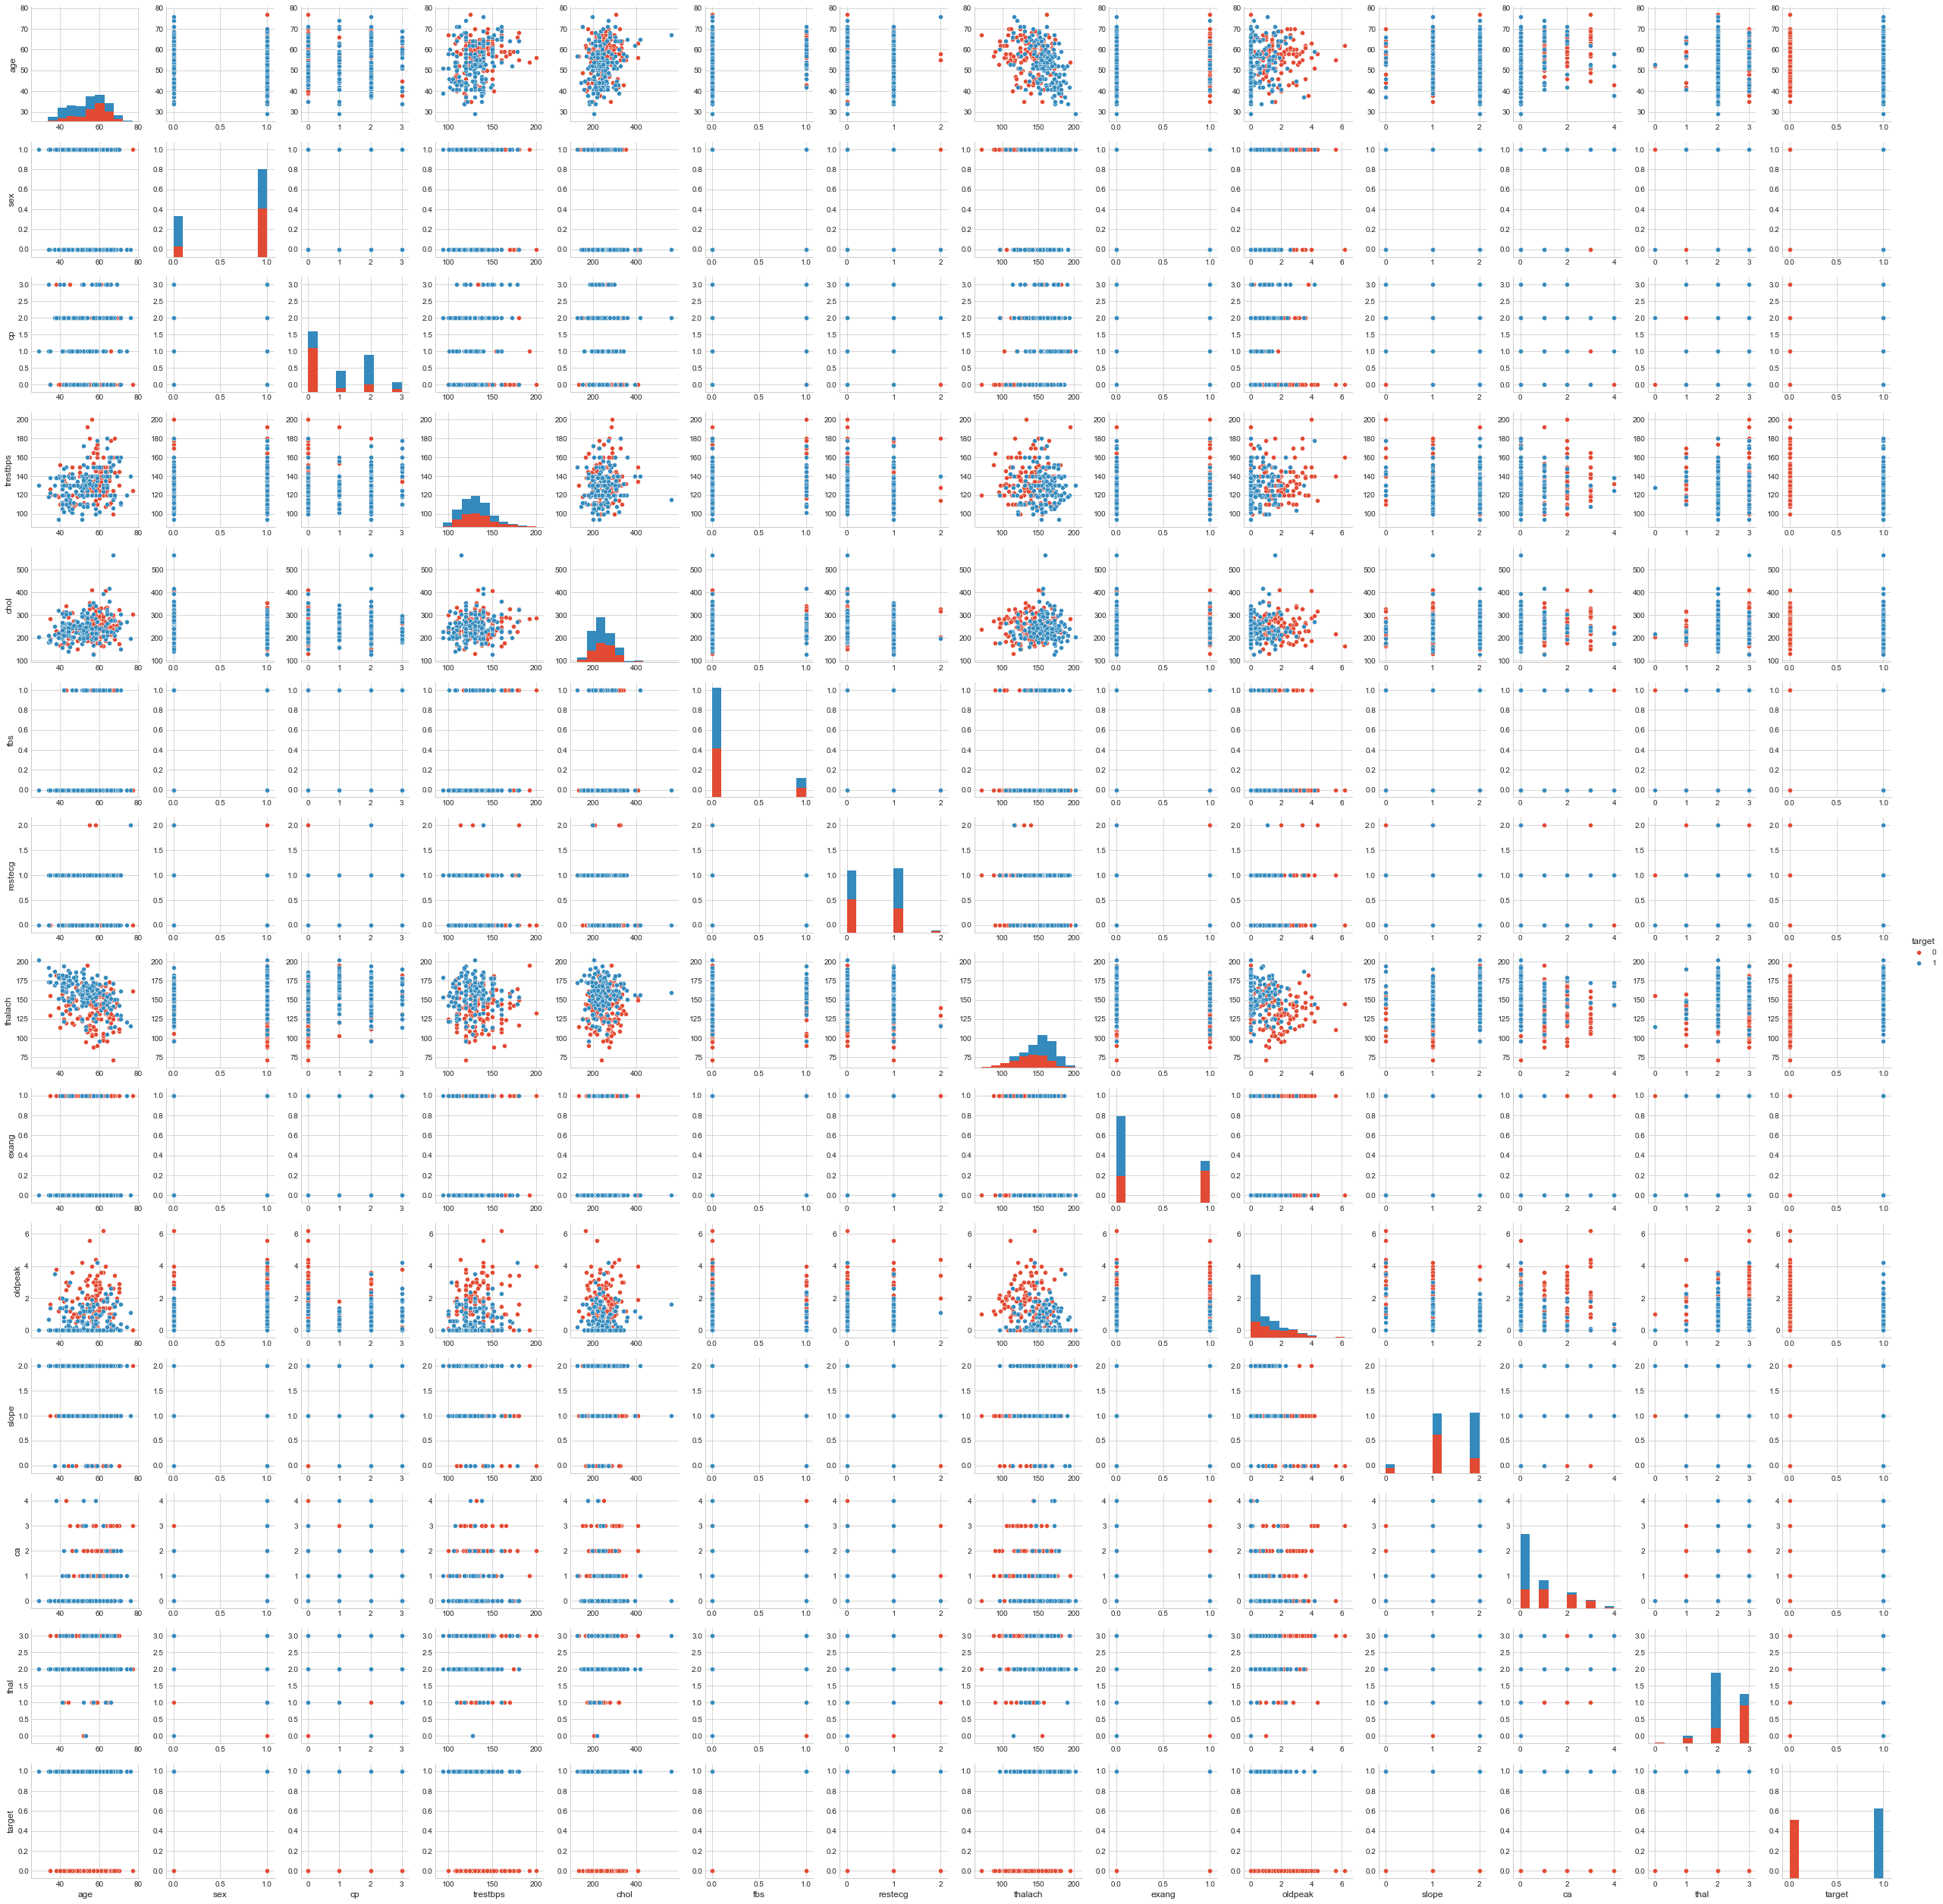

In [45]:
sns.pairplot(heart, hue = 'target')
import warnings
warnings.filterwarnings("ignore")

In [46]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [47]:
heart['Age_Category']= pd.cut(heart['age'],bins=list(np.arange(25, 85, 5)))

Text(0.5,1,'Age Distribution of Patients with -ve Heart Diagonsis')

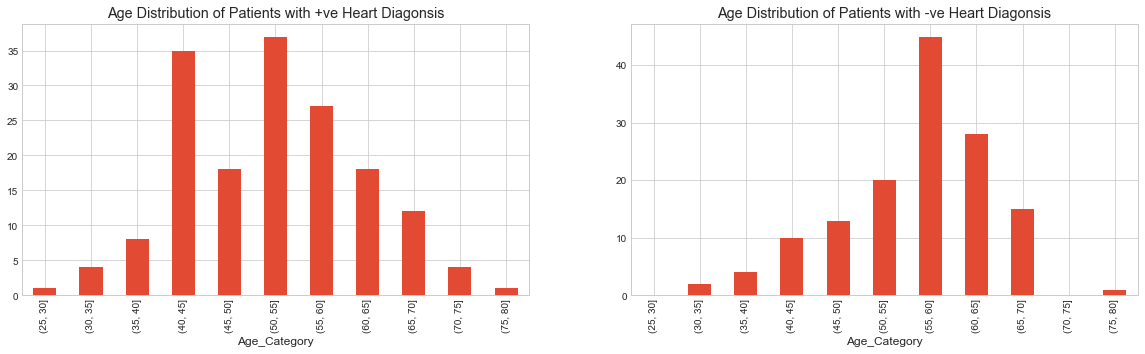

In [48]:
plt.figure(figsize=(20,5))

plt.subplot(121)
heart[heart['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with +ve Heart Diagonsis')

plt.subplot(122)
heart[heart['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with -ve Heart Diagonsis')

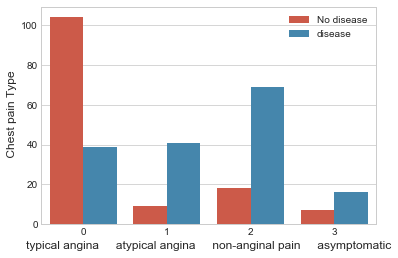

In [49]:
sns.countplot(x = 'cp' ,data = heart, hue = 'target' )
plt.xlabel('typical angina     atypical angina     non-anginal pain     asymptomatic')
plt.ylabel(' Chest pain Type')
plt.legend(['No disease' , 'disease'])

In [1]:
sns.countplot(x = 'fbs' ,data = heart, hue = 'target' )
plt.xlabel('< 120mm/Hg       >120 mm/Hg')
plt.ylabel('Fasting blood sugar')
plt.legend(['No disease' , 'disease'])

NameError: name 'sns' is not defined

In [51]:
df = pd.get_dummies(heart,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','Age_Category'])

In [52]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,"Age_Category_(30, 35]","Age_Category_(35, 40]","Age_Category_(40, 45]","Age_Category_(45, 50]","Age_Category_(50, 55]","Age_Category_(55, 60]","Age_Category_(60, 65]","Age_Category_(65, 70]","Age_Category_(70, 75]","Age_Category_(75, 80]"
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
df.drop(['age'], axis=1, inplace=True)

In [54]:
df.head()

,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,...,"Age_Category_(30, 35]","Age_Category_(35, 40]","Age_Category_(40, 45]","Age_Category_(45, 50]","Age_Category_(50, 55]","Age_Category_(55, 60]","Age_Category_(60, 65]","Age_Category_(65, 70]","Age_Category_(70, 75]","Age_Category_(75, 80]"
0,145,233,150,2.3,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,130,250,187,3.5,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,130,204,172,1.4,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,120,236,178,0.8,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,120,354,163,0.6,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
df.columns


Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'Age_Category_(25, 30]', 'Age_Category_(30, 35]',
       'Age_Category_(35, 40]', 'Age_Category_(40, 45]',
       'Age_Category_(45, 50]', 'Age_Category_(50, 55]',
       'Age_Category_(55, 60]', 'Age_Category_(60, 65]',
       'Age_Category_(65, 70]', 'Age_Category_(70, 75]',
       'Age_Category_(75, 80]'],
      dtype='object')

In [55]:
df.shape

(303, 41)

In [56]:
heart.shape

(303, 15)

In [57]:
x = df.drop(['target'], axis=1)
y = df['target']

In [58]:
x.shape

(303, 40)

In [59]:
y.shape

(303,)

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred = lr.predict(x_test)

In [76]:
x_test.shape

(91, 40)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        43
          1       0.94      0.94      0.94        48

avg / total       0.93      0.93      0.93        91



In [68]:
accuracy_score(y_test,y_pred)

0.93406593406593408

In [69]:
import pickle

file_name = 'lr.pkl'
pickle.dump(lr, open(file_name, 'wb'))

In [70]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
x_test.columns

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'Age_Category_(25, 30]', 'Age_Category_(30, 35]',
       'Age_Category_(35, 40]', 'Age_Category_(40, 45]',
       'Age_Category_(45, 50]', 'Age_Category_(50, 55]',
       'Age_Category_(55, 60]', 'Age_Category_(60, 65]',
       'Age_Category_(65, 70]', 'Age_Category_(70, 75]',
       'Age_Category_(75, 80]'],
      dtype='object')